In [97]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [13]:
d=pd.read_csv(/kaggle/input/ajithkumar/Iris.csv")
d.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Preprocessing the dataset**

In [95]:
d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [14]:
d.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
print("Dataset shape is:",d.shape)

Dataset shape is: (150, 6)


In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
d["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d["Species"]=l.fit_transform(d["Species"])
d["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [20]:
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


**Exploratory Data Analysis**

<Axes: xlabel='Species', ylabel='count'>

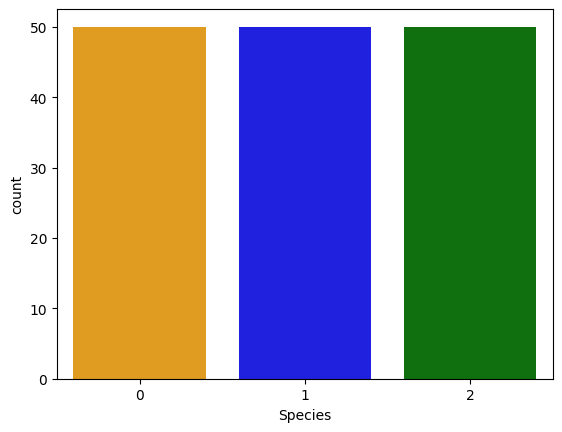

In [29]:
sns.countplot(x="Species",data=d,palette=['orange','blue','green'])

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

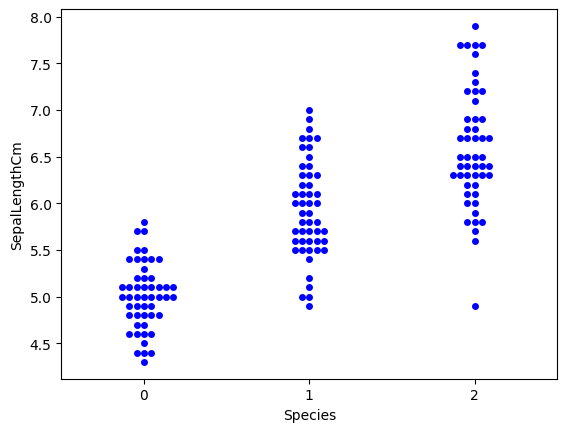

In [32]:
sns.swarmplot(x=d["Species"],y=d["SepalLengthCm"],color='blue')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

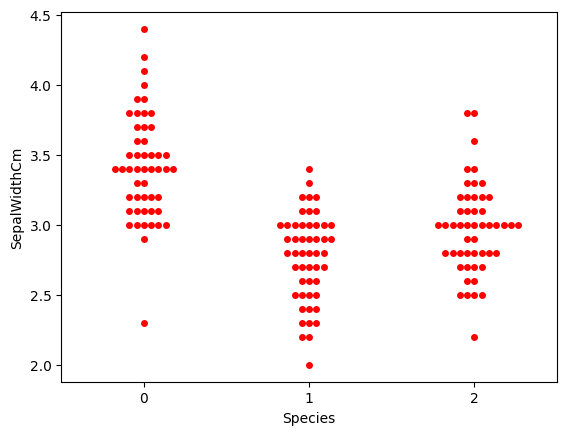

In [34]:
sns.swarmplot(x=d["Species"],y=d["SepalWidthCm"],color='red')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

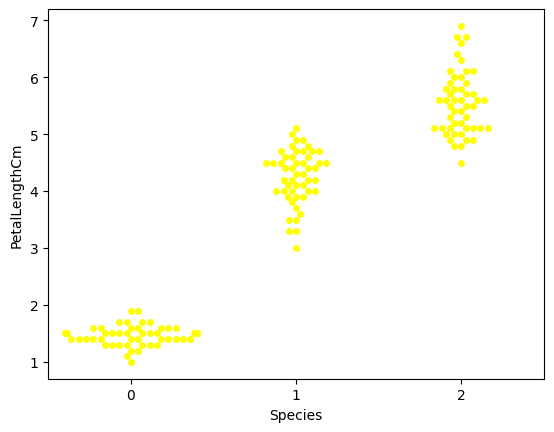

In [47]:
sns.swarmplot(x=d["Species"],y=d["PetalLengthCm"],color='yellow')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

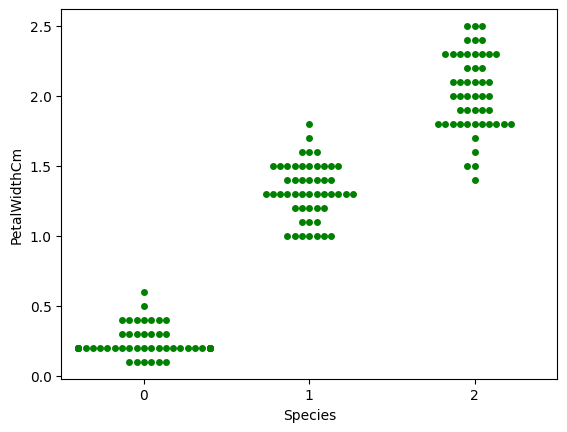

In [48]:
sns.swarmplot(x=d["Species"],y=d["PetalWidthCm"],color='green')

<Axes: >

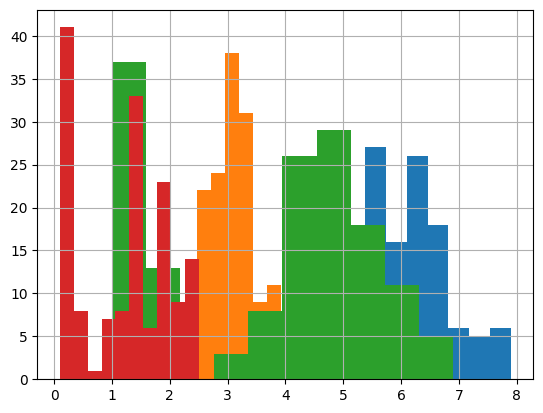

In [49]:
d['SepalLengthCm'].hist()
d['SepalWidthCm'].hist()
d['PetalLengthCm'].hist()
d['PetalWidthCm'].hist()

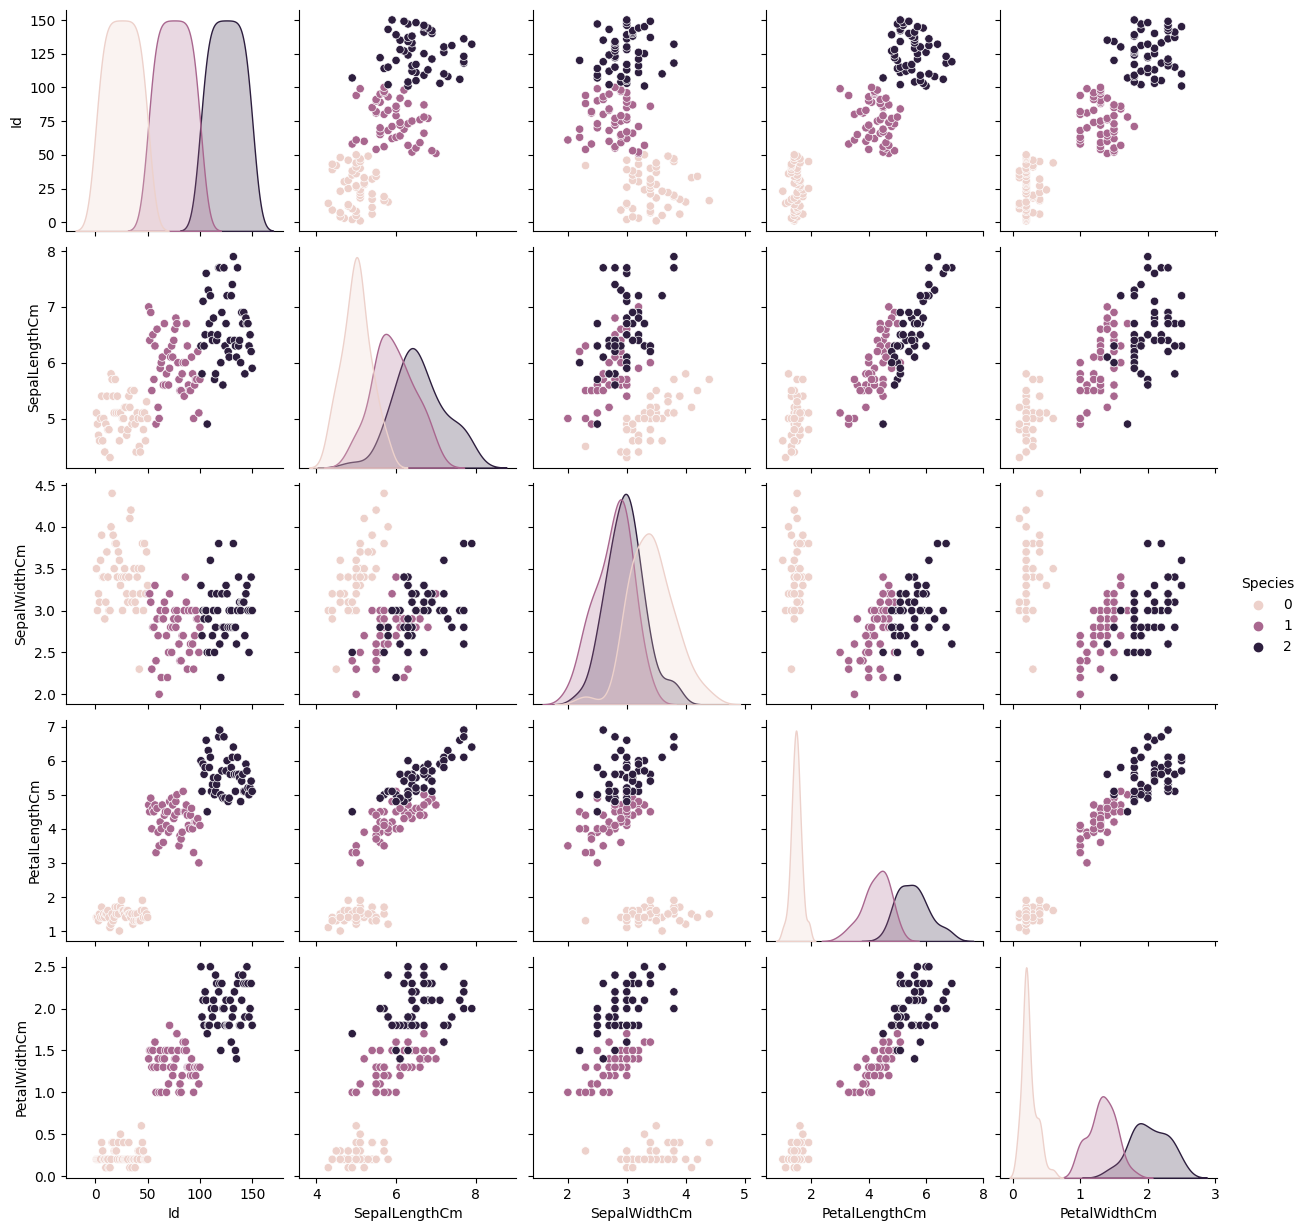

In [50]:
sns.pairplot(d,hue="Species")

**Correlation Matrix**

In [51]:
d.corr().transpose()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

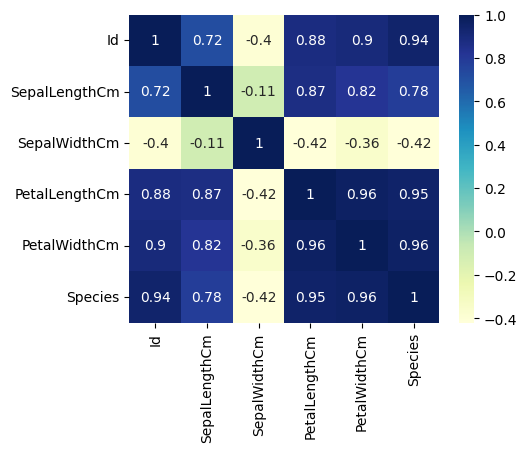

In [52]:
corr=d.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap="YlGnBu")

**Model Training**

In [53]:
X=d.drop(columns=["Species"])
Y=d["Species"]

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [60]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
logreg_Accuracy = logmodel.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", logreg_Accuracy)

Accuracy (Logistic Regression):  100.0


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
knn_Accuracy = knnmodel.score(x_test,y_test)*100
print("Accuracy (KNN): ", knn_Accuracy)

Accuracy (KNN):  100.0


In [62]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
dt_Accuracy = dtmodel.score(x_test,y_test)*100
print("Accuracy (Decision Tree): ", dt_Accuracy)

Accuracy (Decision Tree):  97.77777777777777


**Confusion Matrix**

In [64]:
from sklearn.metrics import confusion_matrix
y_pred1 = logmodel.predict(x_test)
y_pred2 = knnmodel.predict(x_test)
y_pred3 = dtmodel.predict(x_test)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

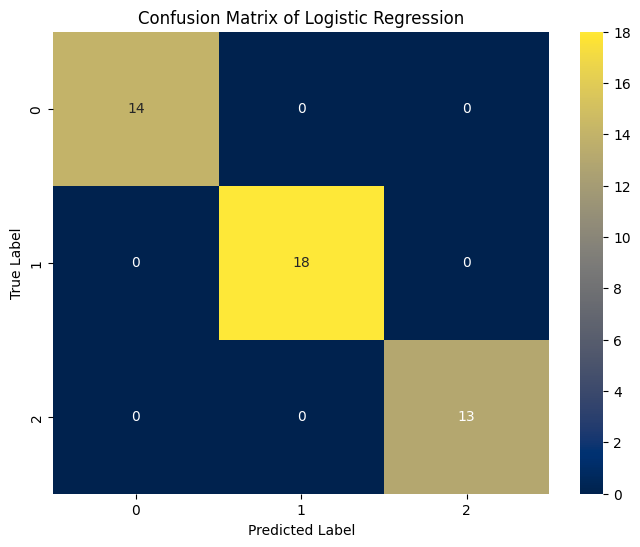

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='cividis', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

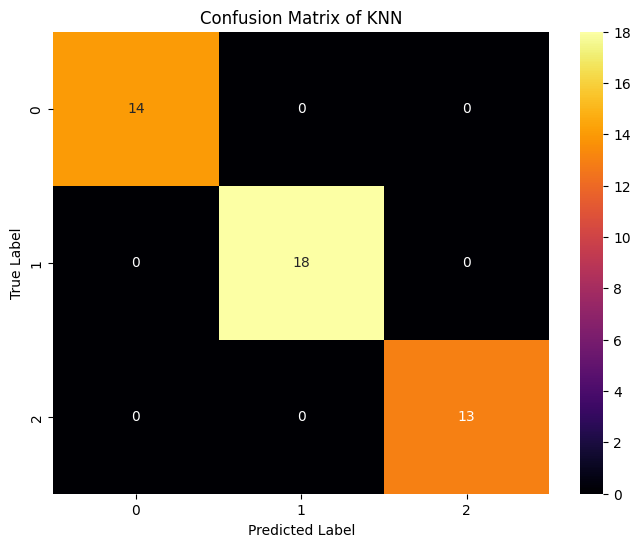

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='inferno', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

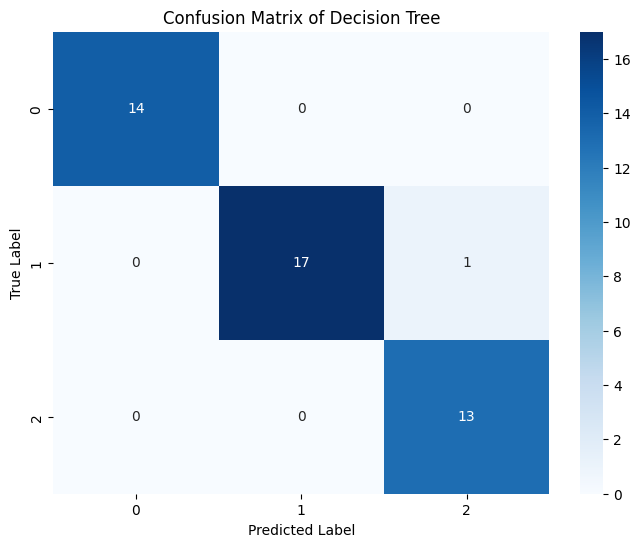

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

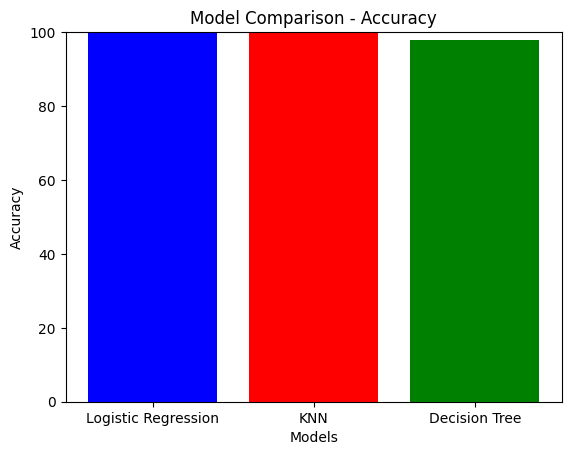

In [72]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [logreg_Accuracy, knn_Accuracy, dt_Accuracy]

plt.bar(models, accuracies, color=['blue', 'red', 'green'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()